# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

**Warning:** This notebook was AI-generated and has not been fully verified. Please interpret the code and results with caution before drawing conclusions or basing further work on this analysis.

This notebook introduces and explores data from [Dandiset 000563, version 0.250311.2145](https://dandiarchive.org/dandiset/000563/0.250311.2145), made available by the Allen Institute's OpenScope project. This dataset includes large-scale, multisite neural recordings using Neuropixels probes in mouse neocortex, focusing on temporally precise neural responses to visual stimuli ("barcoding").

## Notebook Overview
- **Dandiset/project metadata**: Context and summary
- **How to access**: Description and code to load the Dandiset via the DANDI API
- **NWB file structure**: Exploring acquisition, LFP data, and electrode information
- **Visualizations**: Example LFP trace, anatomical mapping of electrodes, and probe geometry
- **Next steps**: Comments on potential further analyses

## About the Dandiset and Project

- **Title:** Allen Institute Openscope - Barcoding
- **DOI/Citation:** Reinagel, Pamela; Lecoq, Jérôme; Durand, Séverine; et al. (2025) Allen Institute Openscope - Barcoding (Version 0.250311.2145) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.000563/0.250311.2145
- **Keywords:** mouse, neuropixel, extracellular electrophysiology, neocortex, barcoding, temporal precision
- **Description:**  
  This experiment used the OpenScope Neuropixels passive viewing protocol, with visually modulated white noise and sinusoidal grating stimuli. It aimed to discover whether barcode-like population neural response patterns are present throughout the mouse brain, enabling cell type discrimination.

**Dandiset link:**  
https://dandiarchive.org/dandiset/000563/0.250311.2145

## What this notebook covers

This notebook demonstrates how to:
1. Access DANDI datasets programmatically.
2. Explore the structure and metadata of an NWB file from this Dandiset.
3. Visualize example time series data (LFP) and map electrodes to anatomical locations and probe geometry.
4. Understand the types of information and analysis possible with this dataset.

**Note:** The code assumes that you have the following packages pre-installed in your environment:

- `dandi`, `pynwb`, `h5py`, `remfile`, `numpy`, `pandas`, `matplotlib`

## Loading the Dandiset via the DANDI API

Below we show how to connect to the DANDI archive, retrieve Dandiset metadata, and list available assets.
**You do not need to download the entire dataset; NWB files can be streamed remotely.**

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000563", "0.250311.2145")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145

First 5 assets:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (ID: 55148cf3-9d15-4d05-a190-4a73e007e48d)
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (ID: 1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1)
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (ID: 6e4d0047-ca6b-4d29-b150-bc9e2c445646)
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb (ID: 54cef618-72de-4c69-b441-8bd5e26049c5)
- sub-699241/sub-699241_ses-1318772854_ogen.nwb (ID: c3bbf094-904e-43b7-83d5-be5a8bf3826f)


---
## Accessing and Exploring a Sample NWB File

For illustration, we will examine one extracellular electrophysiology NWB file:  
**sub-681446/sub-681446_ses-1290510496_probe-0_ecephys.nwb**

**Direct asset URL:**  
https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/

*To explore this file interactively in a browser, try [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/&dandisetId=000563&dandisetVersion=draft).*

### Loading the NWB file (streamed from DANDI)

NWB files can be loaded remotely using PyNWB and remfile for efficient streaming.  
*This avoids the need to download large files locally.*  
The following code demonstrates how to load the selected NWB file and introspect its top-level structure and session/subject metadata.

In [2]:
import pynwb
import h5py
import remfile
import pandas as pd

nwb_url = "https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)
print("Institution:", getattr(nwb, 'institution', 'N/A'))
print("Stimulus notes:", getattr(nwb, 'stimulus_notes', 'N/A'))
print("Subject ID:", nwb.subject.subject_id if nwb.subject else "N/A")
print("Subject:", {k: getattr(nwb.subject, k, 'N/A') for k in ['age', 'sex', 'species', 'strain', 'genotype']})

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: LFP data and associated info for one probe
Identifier: 0
Session start time: 2023-08-16 00:00:00-07:00
Institution: Allen Institute for Brain Science
Stimulus notes: OpenScopeTemporalBarcode
Subject ID: 681446
Subject: {'age': 'P112D', 'sex': 'M', 'species': 'Mus musculus', 'strain': 'Transgenic', 'genotype': 'Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt'}


---
### NWB File Structure and Electrode Metadata

The main LFP data for this probe is in the file as `acquisition['probe_0_lfp']['electrical_series']['probe_0_lfp_data']`.

**Shape of LFP data:** Rows = time points, Columns = LFP channels  
The electrode metadata table (shown below) maps channels to location, device, spatial coordinates, and other relevant metadata.

Let's display the shape, units, and a preview of the electrode DataFrame:

In [3]:
probe_0_lfp = nwb.acquisition["probe_0_lfp"]
electrical_series = probe_0_lfp.electrical_series
probe_0_lfp_data = electrical_series["probe_0_lfp_data"]
print("LFP data shape (samples, channels):", probe_0_lfp_data.data.shape)
print("LFP data dtype:", probe_0_lfp_data.data.dtype)
print("LFP unit:", probe_0_lfp_data.unit)
print("LFP timestamps shape:", probe_0_lfp_data.timestamps.shape)

df_electrodes = probe_0_lfp_data.electrodes.table.to_dataframe()
print("Electrodes table columns:", df_electrodes.columns.tolist())
print("First 5 rows of electrodes table:")
display(df_electrodes.head())

LFP data shape (samples, channels): (10168076, 73)
LFP data dtype: float32
LFP unit: volts
LFP timestamps shape: (10168076,)
Electrodes table columns: ['location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering']
First 5 rows of electrodes table:


,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
2,APN,probeA abc.EcephysElectrodeGroup at 0x13280892...,probeA,40,59,0,2,True,8064.0,3068.0,7299.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
6,APN,probeA abc.EcephysElectrodeGroup at 0x13280892...,probeA,80,59,0,6,True,8056.0,3032.0,7305.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
10,APN,probeA abc.EcephysElectrodeGroup at 0x13280892...,probeA,120,59,0,10,True,8049.0,2996.0,7312.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
14,APN,probeA abc.EcephysElectrodeGroup at 0x13280892...,probeA,160,59,0,14,True,8040.0,2952.0,7320.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
18,APN,probeA abc.EcephysElectrodeGroup at 0x13280892...,probeA,200,59,0,18,True,8032.0,2916.0,7326.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


---
## Visualization 1: Example LFP Traces

Below, we plot the first 5 seconds of LFP from the first 5 channels. Channel signals are offset for clarity.  
*(Acquisition is at 625 Hz; 5 seconds × 625 Hz = 3125 timepoints.)*

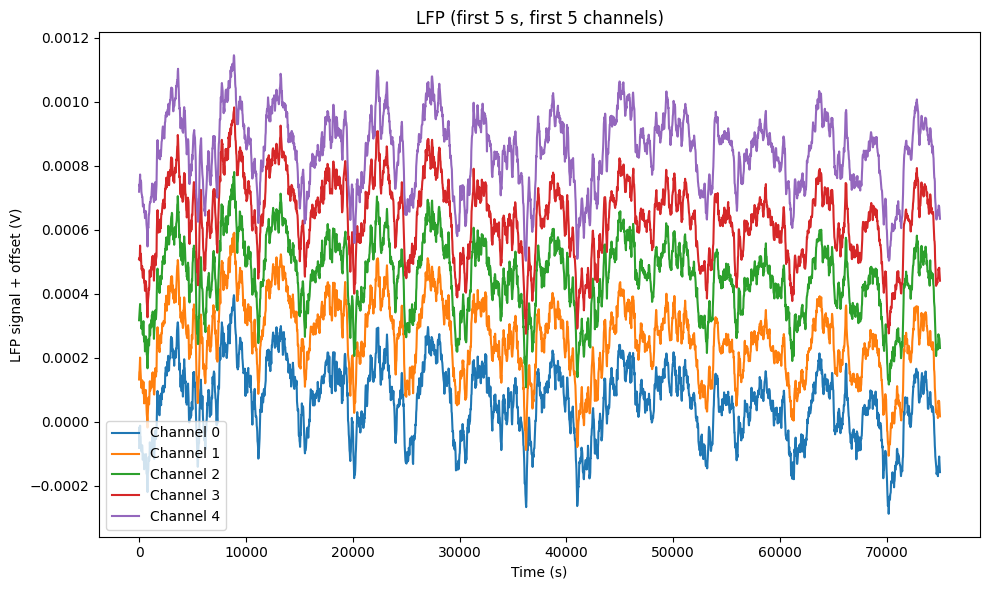

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fs = 625
n_channels = 5
n_samples = fs * 5

lfp = probe_0_lfp_data.data[:n_samples, :n_channels]
timestamps = probe_0_lfp_data.timestamps[:n_samples]

plt.figure(figsize=(10, 6))
offset = 200e-6  # 0.2 mV offset for clarity
for ch in range(n_channels):
    plt.plot(timestamps, lfp[:, ch] + ch * offset, label=f'Channel {ch}')
plt.xlabel('Time (s)')
plt.ylabel('LFP signal + offset (V)')
plt.title('LFP (first 5 s, first 5 channels)')
plt.legend()
plt.tight_layout()
plt.show()

---
## Visualization 2: Electrode Count by Location

This bar plot illustrates the distribution of electrodes across identified anatomical locations.

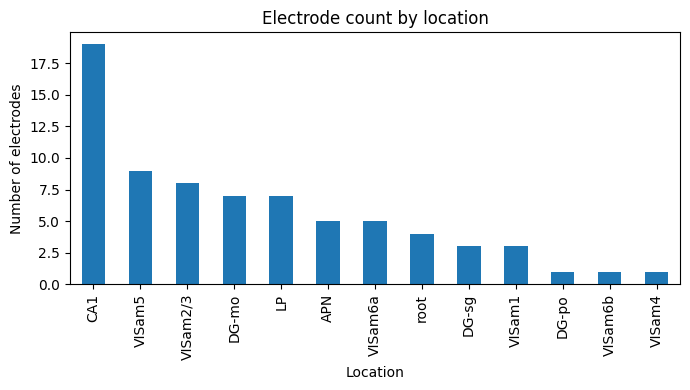

In [5]:
df_electrodes['location'].value_counts().plot(kind='bar', figsize=(7,4))
plt.title('Electrode count by location')
plt.xlabel('Location')
plt.ylabel('Number of electrodes')
plt.tight_layout()
plt.show()

---
## Visualization 3: Electrode Vertical Position Along the Probe

Each point represents an electrode, showing its position along the vertical axis of the Neuropixels probe.

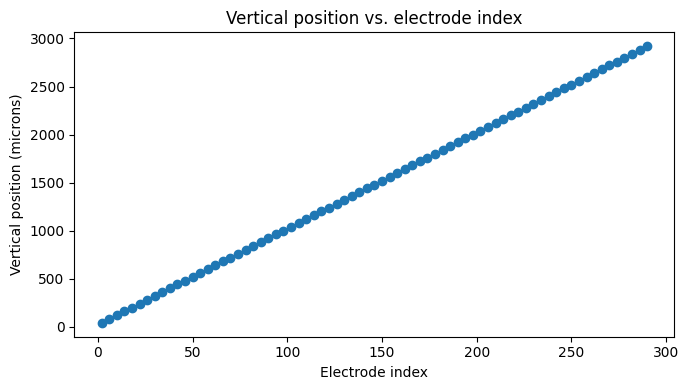

In [6]:
plt.figure(figsize=(7,4))
plt.scatter(df_electrodes.index, df_electrodes['probe_vertical_position'])
plt.title('Vertical position vs. electrode index')
plt.xlabel('Electrode index')
plt.ylabel('Vertical position (microns)')
plt.tight_layout()
plt.show()

---
## Summary and Next Steps
- **We have explored the structure and content of Dandiset 000563 using streaming NWB file access.**
- **Visualizations highlight LFP signal structure and probe/electrode mapping, providing a strong foundation for further analysis.**

*Recommended next steps:*
- Investigate spike trains, units, and stimulus-response relationships
- Subset recordings by anatomical location or probe group
- Cross-reference LFP features with behavioral events or stimulus identity
- Explore additional NWB files in this Dandiset (e.g., from other probes/mice)

For in-depth, interactive exploration, consider using [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/&dandisetId=000563&dandisetVersion=draft) or developing custom workflows that follow the patterns presented in this notebook.